In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Import Train Data Set

In [2]:
df = pd.read_csv('https://github.com/Parasgr7/Google-Stock-Price-Prediction/raw/master/Google_Stock_Price_Train.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [4]:
training_set=df.iloc[:,1:2].values

In [5]:
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

# Import the MinMaxScaler

In [6]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
train_Set_scaled = sc.fit_transform(training_set)

# Split the data in X_traina and Y_train

In [7]:
x_train = []
y_train = []
for i in range(60,1258):
    x_train.append(train_Set_scaled[i - 60:i,0])
    y_train.append(train_Set_scaled[i,0])
x_train , y_train = np.array(x_train), np.array(y_train)

In [8]:
x_train = np.reshape(x_train , (x_train.shape[0] , x_train.shape[1],1 ))

In [9]:
x_train.shape

(1198, 60, 1)

# Apply sequiencitial Model

In [10]:
regressor = Sequential()

In [11]:
regressor.add(LSTM(units = 100 , return_sequences = True , input_shape = (x_train.shape[1],1)))
regressor.add(Dropout(0.4))

C:\Jupyter\New folder\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
regressor.add(LSTM(units=100,return_sequences=True))
regressor.add(Dropout(0.6))


In [13]:
regressor.add(LSTM(units=100,return_sequences=True))
regressor.add(Dropout(0.6))

In [14]:
regressor.add(LSTM(units=100))
regressor.add(Dropout(0.4))

In [15]:
regressor.add(Dense(units = 1))

In [16]:
regressor.compile(optimizer = "adam" , loss = "mean_squared_error")

In [17]:
regressor.fit(x_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 8s 67ms/step - loss: 0.0622
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 0.0094
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 0.0075
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 0.0064
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.0066
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.0054
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 0.0059
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 0.0063
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.0054
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 0.0052
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.0056
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.0048
Epoch 13/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 0.0049
Epoch 14/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - loss: 0.0045
Epoch 15/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - lo

# Import Test Data Set

In [18]:
test = pd.read_csv('https://github.com/Parasgr7/Google-Stock-Price-Prediction/raw/master/Google_Stock_Price_Test.csv')

In [19]:
test.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [20]:
real_stock_price = test.iloc[:, 1:2].values

In [21]:
total_data = pd.concat([df["Open"] , test["Open"]],axis = 0)

In [22]:
input = total_data[len(df) - len(test) - 60 : ].values
input = input.reshape(-1,1)
input = sc.transform(input)

In [23]:
x_test = []
for i in range(60,80):
    x_test.append(input[i-60:i,0])
x_test=np.array(x_test)
x_test.shape
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

# To Predict hte Data in x_teain Model

In [24]:
predicted_stock_price = regressor.predict(x_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 503ms/step


# Plot the graph as per the prediction Values

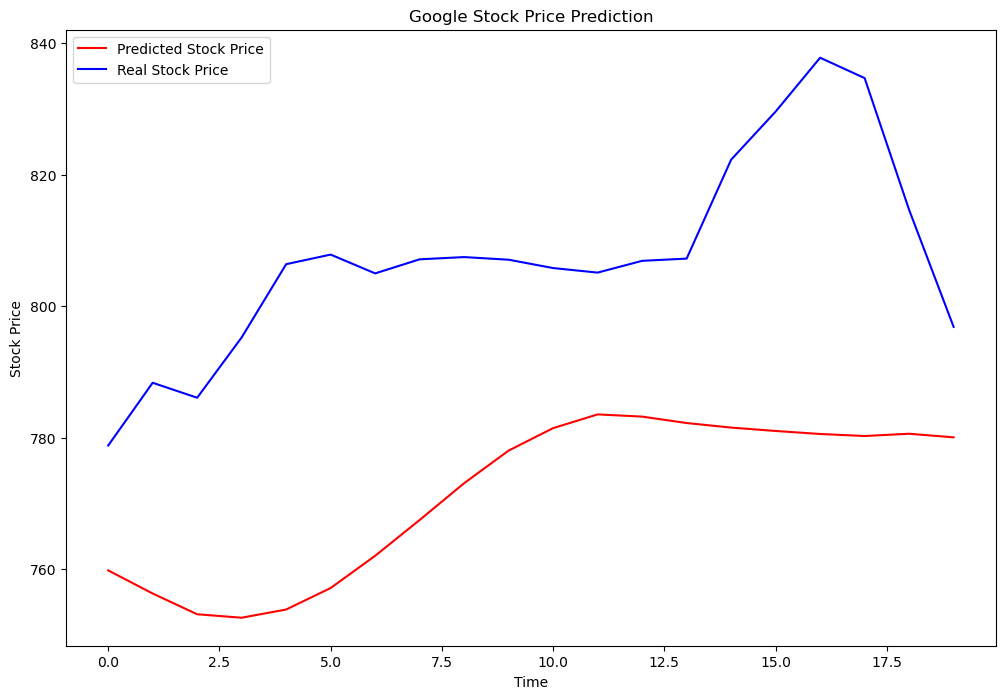

In [25]:
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(predicted_stock_price,color="red",label ="Predicted Stock Price")
plt.plot(real_stock_price,color = "blue" , label = "Real Stock Price")
plt.title("Google Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()
plt.show()